In [1397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') #경고표시 없애기 
#warnings.filterwarnings(action = 'default') #경고표시 

In [1398]:
##데이터 분석 과정 
##주제 -- 수집 -- 전처리 --EDA-예측시스템(회귀, 분류)-- 실제예측--시각화/서비스구현 
##y = ax +b , a는 기울기, b는 y절편,x는 변수값
##y = ax1 + cx2+dx3 + b
##y = 죽을것인가/살것인가에 대한 결과 예측값 
##x1, x2, x3가 결과를 결정하는 변수들 
##=>age, pclass, alone

In [1399]:
raw_data = pd.read_excel('../csv-data/titanic.xls')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [1400]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [1401]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


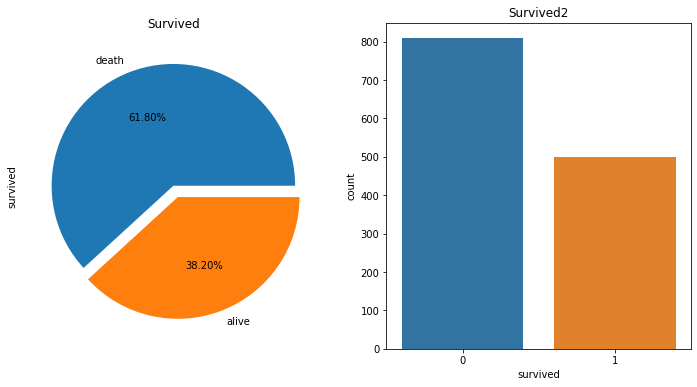

In [1402]:
f, ax = plt.subplots(1,2,figsize=(12,6))
labels = ['death','alive']
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',
                                             labels=labels,
                                             ax=ax[0])
ax[0].set_title('Survived')

sns.countplot('survived', data = raw_data, ax = ax[1])

ax[1].set_title('Survived2')
plt.show()

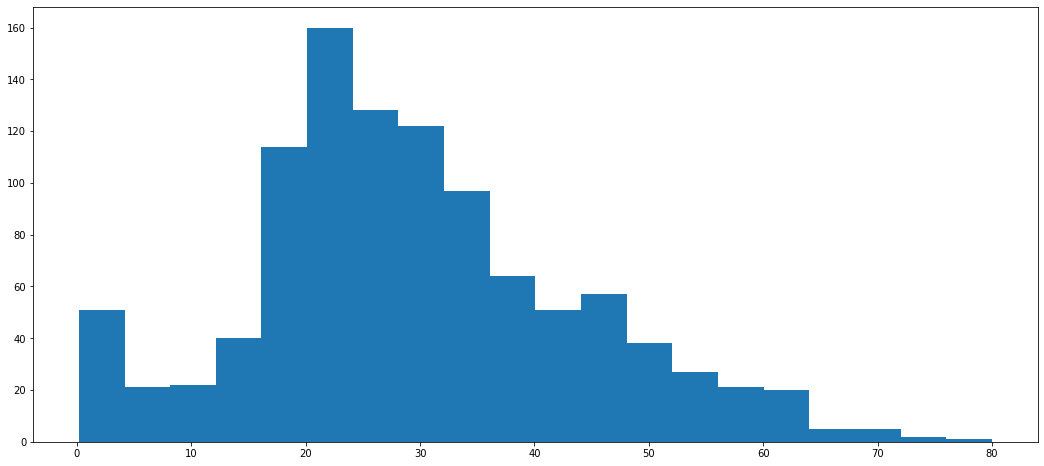

In [1403]:
##age의 분포를 그려보세요 
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False)

In [1404]:
#pclass별 평균
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [1405]:
#변수들간의 상관도 
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


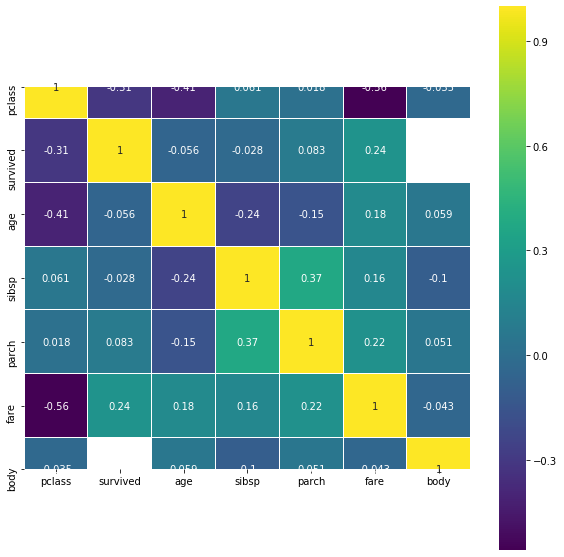

In [1406]:
#heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, 
            annot=True, cmap=plt.cm.viridis , linecolor='white' )
plt.show()



In [1407]:
rd_sex = raw_data['sex'].value_counts()
rd_sex

male      843
female    466
Name: sex, dtype: int64

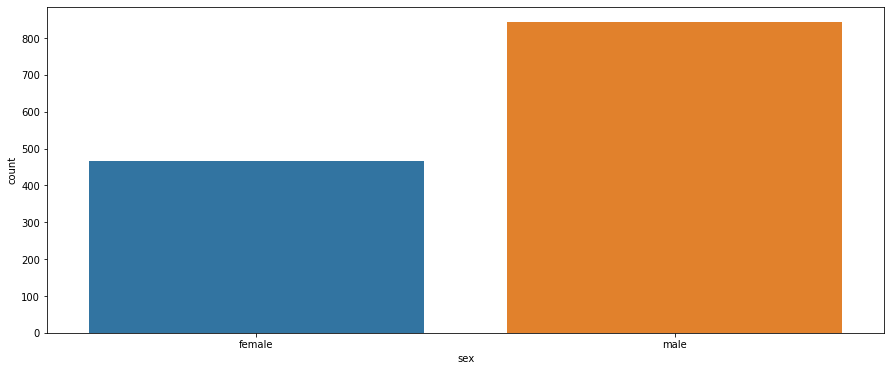

In [1408]:
plt.figure(figsize=(15,6))
sns.countplot('sex',data=raw_data)
plt.show()

In [1409]:
svc = raw_data['survived'].value_counts()
svc

0    809
1    500
Name: survived, dtype: int64

In [1410]:
svc.index= ['death','alive']
svc

death    809
alive    500
Name: survived, dtype: int64

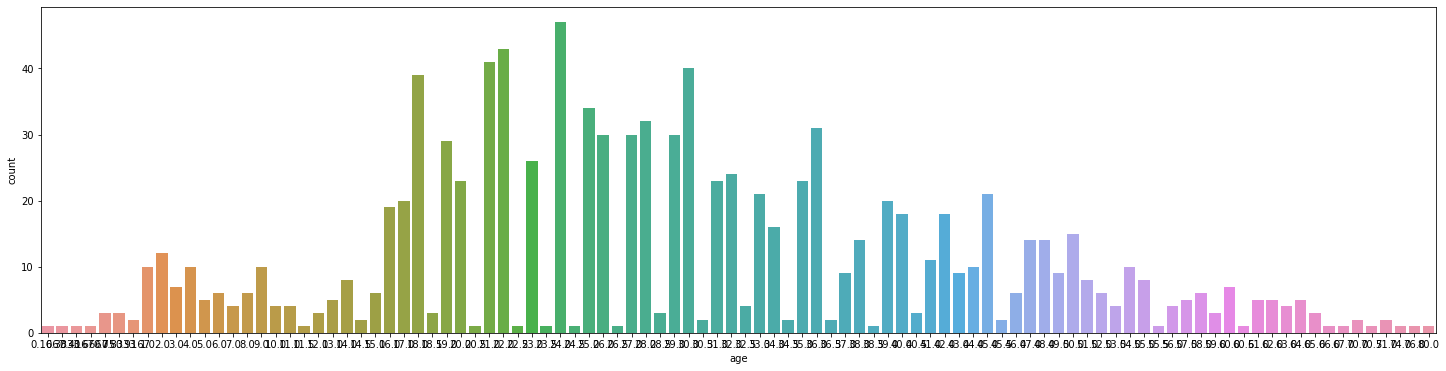

In [1411]:
plt.figure(figsize=(25,6))
sns.countplot('age',data=raw_data) #왼쪽에는 컬럼명, 오른쪽에는 데이터프레임 
plt.show()

In [1412]:
raw_data.groupby(by='pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [1413]:
rd_corr = raw_data.corr()
rd_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [1414]:
#성별 카운트 
rd_sex = raw_data.groupby(by='sex').count()[['survived']]
#raw_data['sex'].count()
#성별 생사인원

In [1415]:
rd_sex = raw_data['sex'].value_counts() #성별인원 
rd_sex

male      843
female    466
Name: sex, dtype: int64

In [1416]:
sex_alive = raw_data.groupby(by='sex')['survived'].sum()#생존인원 
sex_alive #Series


sex
female    339
male      161
Name: survived, dtype: int64

In [1417]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [1418]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [1419]:
#나이를 평균으로 대체하려고 함. 
#나이의 평균 
#age컬럼 중에 nan을 평균으로 대체해주세요  
raw_data2=raw_data.fillna({'age':raw_data['age'].mean()})
raw_data2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [1420]:
#raw_data.isnull().sum()
raw_data2.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [1421]:
age_mean = raw_data['age'].mean()
print(age_mean)

##age컬럼중에 nan을 평균으로 대체해주세요 
raw_data['age'].fillna(age_mean, inplace=True)

##nan이 있는지 없는지 결과를 확인 
raw_data['age'].isnull().sum()


29.8811345124283


0

In [1422]:
#나이대별 값의 범위가 너무 많아서 범위를 묶기로 함 
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins= [0,20,35,55,100],                #범위
                            include_lowest = True,
                            labels = ["children","young","adult","old"]
                            )

raw_data['age_cat'][:5]


0       young
1    children
2    children
3       young
4       young
Name: age_cat, dtype: category
Categories (4, object): [children < young < adult < old]

In [1423]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat'],
      dtype='object')

In [1424]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [1425]:
#컬럼삭제: ticket, cabin, embarked, body, boat, home, dest후 확인 
raw_data.drop(columns=['ticket', 'cabin', 'embarked', 'body', 'boat', 'home.dest'], inplace=True)
raw_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children


In [1426]:
#age가 결측치(NaN)가 들어있는데, 
#어떻게 해야하는가?
#1, 컬럼삭제 :너무 결측치가 많은 경우, 상관도가 다른 변수들에 비해서 많이 낮은 경우 
#2. 행삭제:결측치가 있는 instance만 삭제 행을 삭제해도 다른 instance가 많이 남아있는 경우 
#3. 다른값으로 대체 : 대체해도 크게 문제가 없을 때, 다른 instance가 많지 않을 떄 
#   다른 값 >>숫자인경우: 0(최소값), 평균치(전체 데이터의 분포를 깨지 않을 목적) 
#             문자인경우: 해당사항 없음, 값을 목록을 만들어서 랜덤하게 넣음

In [1427]:
#sibsp: 함계 탑승한 형제자매나 배우자 수 (수평적 관계)
#parch: 함께 탑승한 부모나 자녀의 수 (수직적 관계)

In [1428]:
#age_cat별 평균을 내보세요. 
raw_data.groupby(by='age_cat').mean()

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
children,2.568548,0.459677,12.782930,0.991935,0.745968,29.025169
young,2.442490,0.350474,28.124139,0.381597,0.217862,26.865154
adult,1.806084,0.410646,43.699620,0.403042,0.509506,47.149810
old,1.474576,0.322034,62.161017,0.322034,0.406780,70.663722


In [1429]:
sex_alive = raw_data.groupby(by='sex')['survived'].sum()
print(sex_alive)
list_sa = list(sex_alive)
list_sa.reverse()
list_sa

sex
female    339
male      161
Name: survived, dtype: int64


[161, 339]

In [1430]:
rd_sex_list = list(rd_sex)
rd_sex_list

[843, 466]

In [1431]:
for i in range(2):
    print(rd_sex.index[i])
    print('생존인원:',list_sa[i], '<-->탑승인원:',rd_sex_list[i])

male
생존인원: 161 <-->탑승인원: 843
female
생존인원: 339 <-->탑승인원: 466


In [1432]:
sex_df = pd.DataFrame({'alive':list_sa, 'board':rd_sex_list}, index= ['male','female'])
sex_df

,alive,board
male,161,843
female,339,466


In [1433]:
dead_result = sex_df['board']-sex_df['alive']
dead_result

male      682
female    127
dtype: int64

In [1434]:
dead_result.index= ['male','female']

In [1435]:
dead_result

male      682
female    127
dtype: int64

In [1436]:
sex_df.reset_index(inplace=True)
sex_df

,index,alive,board
0,male,161,843
1,female,339,466


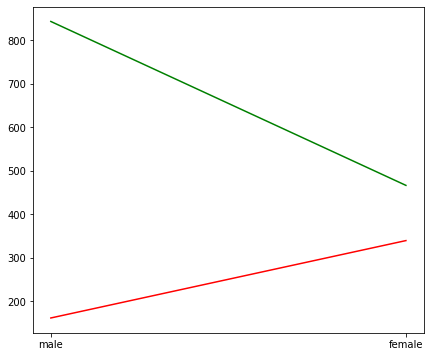

In [1437]:
plt.figure(figsize=(7,6))
plt.plot(sex_df['index'], sex_df['board'], color = 'g')
plt.plot(sex_df['index'], sex_df['alive'], color = 'r')
plt.show()


In [1438]:
sex_df.set_index('index', inplace=True)

In [1439]:
sex_df

,alive,board
index,,
male,161,843
female,339,466


<Figure size 504x432 with 0 Axes>

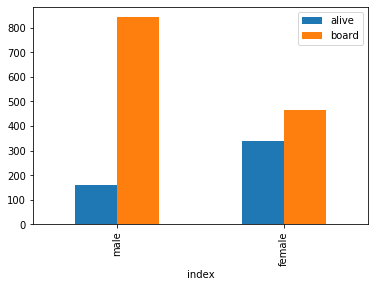

In [1440]:
plt.figure(figsize=(7,6))
sex_df.plot(kind='bar')
plt.show()

In [1441]:
raw_data[:3]

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,children


In [1442]:
def func(x):
    if x=='female':
        return 0
    else:
        return 1

In [1443]:
raw_data['sex'] = raw_data['sex'].apply(func)
raw_data['sex'][:2]

0    0
1    1
Name: sex, dtype: int64

In [1444]:
raw_data[:3]
raw_data=raw_data.drop('name',axis=1)


In [1445]:
raw_data

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.000000,0,0,211.3375,young
1,1,1,1,0.916700,1,2,151.5500,children
2,1,0,0,2.000000,1,2,151.5500,children
3,1,0,1,30.000000,1,2,151.5500,young
4,1,0,0,25.000000,1,2,151.5500,young
...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,children
1305,3,0,0,29.881135,1,0,14.4542,young
1306,3,0,1,26.500000,0,0,7.2250,young
1307,3,0,1,27.000000,0,0,7.2250,young


In [1446]:
def func2(x):
    if x == 'children':
        return 0
    elif x == 'young':
        return 1
    elif x == 'adult':
        return 2
    else:
        return 3

In [1447]:
raw_data['age_cat'] = raw_data['age_cat'].apply(func2)
raw_data['age_cat']

0       1
1       0
2       0
3       1
4       1
       ..
1304    0
1305    1
1306    1
1307    1
1308    1
Name: age_cat, Length: 1309, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [1448]:
raw_data

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.000000,0,0,211.3375,1
1,1,1,1,0.916700,1,2,151.5500,0
2,1,0,0,2.000000,1,2,151.5500,0
3,1,0,1,30.000000,1,2,151.5500,1
4,1,0,0,25.000000,1,2,151.5500,1
...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,0
1305,3,0,0,29.881135,1,0,14.4542,1
1306,3,0,1,26.500000,0,0,7.2250,1
1307,3,0,1,27.000000,0,0,7.2250,1


In [1449]:
#숫자로 바꿔주는 것을 정제된 데이터 라고함.(컴퓨터가 이해할 수 있는 형태로 바꿔주는 것.)
raw_data['fare'].isnull().sum()

1

In [1450]:
raw_data['fare'].fillna(raw_data['fare'].mean(), inplace=True)

In [1451]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
age_cat     1309 non-null category
dtypes: category(1), float64(2), int64(5)
memory usage: 73.2 KB


In [1452]:
 raw_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,1
4,1,0,0,25.0000,1,2,151.5500,1


In [1453]:
#1.먼저 공부를 많이 하고(연습용 데이터,훈련 데이터,train data)
#2. 모의고사 (75점 이상)(검증용 데이터, test data)
#==>data를 나누어보자. 

#3. 실제로 예측하는 프로그램 사용할 예정 ->본시험 


In [1454]:
from sklearn.model_selection import train_test_split 

In [1455]:
df_data = raw_data[['pclass','age','sex','sibsp','parch','fare','survived']]
df_data

,pclass,age,sex,sibsp,parch,fare,survived
0,1,29.000000,0,0,0,211.3375,1
1,1,0.916700,1,1,2,151.5500,1
2,1,2.000000,0,1,2,151.5500,0
3,1,30.000000,1,1,2,151.5500,0
4,1,25.000000,0,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542,0
1305,3,29.881135,0,1,0,14.4542,0
1306,3,26.500000,1,0,0,7.2250,0
1307,3,27.000000,1,0,0,7.2250,0


In [1456]:
df_data[['pclass','age','sex','sibsp','parch','fare']]

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [1457]:
df_data[['pclass','age','sex','sibsp','parch','fare']]

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [1458]:
exam = df_data.iloc[:,:6]
exam

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [1459]:
target = df_data['survived']
target[:2]

0    1
1    1
Name: survived, dtype: int64

In [1460]:
#훈련, 검증용 데이터를 분류 
#문제+답
#훈련용문제+훈련답
#검증문제 + 검증답 

In [1461]:
import random #매번 돌릴때마다 데이터가 바뀌면 왜 바꼈는지 알수 없다. 
random.seed(42) #시드 == 씨앗, 씨앗값 
for _ in range(10):
    print(random.randint(1,10), end = '')

21544329210

In [1462]:
#훈련 문제, 검증 문제, 훈련 답, 검증 답 
#X_train, X_test, y_train, y_test 
train_exam, test_exam, train_target, test_target=train_test_split(exam,#문제
                 target,#답
                 test_size = 0.2, #검증비율 20%, 훈련비율 80% 
                 random_state = 42 #seed
                )

In [1463]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 772 to 1126
Data columns (total 6 columns):
pclass    1047 non-null int64
age       1047 non-null float64
sex       1047 non-null int64
sibsp     1047 non-null int64
parch     1047 non-null int64
fare      1047 non-null float64
dtypes: float64(2), int64(4)
memory usage: 57.3 KB


In [1464]:
train_target.count()

1047

In [1465]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1148 to 199
Data columns (total 6 columns):
pclass    262 non-null int64
age       262 non-null float64
sex       262 non-null int64
sibsp     262 non-null int64
parch     262 non-null int64
fare      262 non-null float64
dtypes: float64(2), int64(4)
memory usage: 14.3 KB


In [1466]:
test_target.count()

262

In [1467]:
##공부방법 선택 : 공부방법이 정형화된 것(알고리즘,방법론,모델링)
#공부방법론이 많으므로 컴퓨터가 학습할 방법론을 선택해서 알려주어야 함. 
#방법론은 클래스로 만들어져 있음. 

In [1468]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
772,3,17.000000,1,0,0,7.8958
543,2,36.000000,1,0,0,10.5000
289,1,18.000000,0,0,2,79.6500
10,1,47.000000,1,1,0,227.5250
147,1,29.881135,1,0,0,42.4000


In [1469]:
test_exam.reset_index(inplace=True)

In [1470]:
test_exam

,index,pclass,age,sex,sibsp,parch,fare
0,1148,3,35.000000,1,0,0,7.1250
1,1049,3,20.000000,1,1,1,15.7417
2,982,3,29.881135,1,0,0,7.8958
3,808,3,29.881135,1,0,0,8.0500
4,1195,3,29.881135,1,0,0,7.7500
...,...,...,...,...,...,...,...
257,572,2,28.000000,0,0,0,12.6500
258,140,1,23.000000,1,0,1,63.3583
259,1182,3,21.000000,0,0,0,7.6500
260,312,1,50.000000,1,1,1,211.5000


In [1471]:
del test_exam['index']

In [1472]:
test_exam

,pclass,age,sex,sibsp,parch,fare
0,3,35.000000,1,0,0,7.1250
1,3,20.000000,1,1,1,15.7417
2,3,29.881135,1,0,0,7.8958
3,3,29.881135,1,0,0,8.0500
4,3,29.881135,1,0,0,7.7500
...,...,...,...,...,...,...
257,2,28.000000,0,0,0,12.6500
258,1,23.000000,1,0,1,63.3583
259,3,21.000000,0,0,0,7.6500
260,1,50.000000,1,1,1,211.5000


In [1473]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
772,3,17.000000,1,0,0,7.8958
543,2,36.000000,1,0,0,10.5000
289,1,18.000000,0,0,2,79.6500
10,1,47.000000,1,1,0,227.5250
147,1,29.881135,1,0,0,42.4000


In [1474]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
772,3,17.000000,1,0,0,7.8958
543,2,36.000000,1,0,0,10.5000
289,1,18.000000,0,0,2,79.6500
10,1,47.000000,1,1,0,227.5250
147,1,29.881135,1,0,0,42.4000


In [1475]:
train_target =train_target.reset_index()
train_target[:5]

,index,survived
0,772,0
1,543,0
2,289,1
3,10,0
4,147,0


In [1476]:
del train_target['index']

In [1477]:
test_target = test_target.reset_index()
test_target[:5]

,index,survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [1478]:
test_target

,index,survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0
...,...,...
257,572,1
258,140,1
259,1182,1
260,312,0


In [1479]:
#del test_target['level_0']

In [1480]:
del test_target['index']

In [1481]:
test_target[:5]

,survived
0,0
1,1
2,0
3,0
4,0


In [1482]:
train_target

,survived
0,0
1,0
2,1
3,0
4,0
...,...
1042,0
1043,0
1044,0
1045,1


In [1483]:
#del train_target['level_0']

In [1484]:
train_target

,survived
0,0
1,0
2,1
3,0
4,0
...,...
1042,0
1043,0
1044,0
1045,1


In [1485]:
from sklearn.tree import DecisionTreeClassifier

In [1486]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [1487]:
tree_clf.fit(train_exam,train_target) #많이 공부 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [1488]:
tree_clf.score(train_exam, train_target) #많이 공부한 것에 대한 점수 
                                        #train data에 대한 정확도(어큐러시)

0.8261700095510984

In [1489]:
from sklearn.metrics import accuracy_score

In [1490]:
com_target = tree_clf.predict(test_exam) #모의고사를 풀어보자. 문제를 푼 답
com_target[:5]
#검증용 데이터로 검증 
#컴퓨터가 예측한 값들과 검증용 데이터의 정답과의 비교, 정확도를 계산할 예정 

array([0, 0, 0, 0, 0], dtype=int64)

In [1491]:
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점 

0.7786259541984732

In [1492]:
train_exam.columns

Index(['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare'], dtype='object')

In [1493]:
decaprio= [3,19,1,0,0,5]            #pclass age sex	sibsp	parch	fare

In [1494]:
result1 = tree_clf.predict_proba([decaprio])
result1
#결과는 index순으로 보면 됨.
#array([[1., 0.]]): index 0(죽음)일 가능성 100% ,index1(살았음)일 가능성이 0% 

array([[0.88622754, 0.11377246]])

In [1495]:
result1[0][0] #죽을 가능성 

0.8862275449101796

In [1496]:
result1[0][1] #살 가능성 

0.11377245508982035

In [1497]:
if result1[0][0]>result1[0][1]:
    print('죽을 가능성이 더 높다.')
    print('가능성 지수는', int(result1[0][0]*100),'%')
else:
    print('살 가능성이 더 높다.')
    print('가능성 지수는', int(result1[0][1]*100),'%')
    

죽을 가능성이 더 높다.
가능성 지수는 88 %


In [1498]:
winslet = [1,17,0,1,1,100]

In [1499]:
result2=tree_clf.predict_proba([winslet])
result2


array([[0.01834862, 0.98165138]])

In [1500]:
if result2[0][0]>result2[0][1]:
    print('죽을 가능성이 더 높다.')
    print('가능성 지수는', int(result2[0][0]*100),'%')
else:
    print('살 가능성이 더 높다.')
    print('가능성 지수는', int(result2[0][1]*100),'%')
    

살 가능성이 더 높다.
가능성 지수는 98 %


In [1503]:
print(tree_clf.feature_importances_) 
#['pclass','age','sex','sibsp','parch','fare'] 영향을 끼치는 정도 


[0.20997326 0.06080062 0.63232965 0.04431166 0.         0.05258481]


In [1504]:
#가중치가 거의 없었던 피쳐는 sibsp','parch','fare','age'
#가중치가 중간정도 있었던 피쳐는 'pclass'
#가중치가 제일 컸던 피쳐는 'sex'

In [1506]:
#그래프로 그려보세요. 
x = ['pclass','age','sex','sibsp','parch','fare']
y = tree_clf.feature_importances_

In [1507]:
result_df = pd.DataFrame({'feature':x,'weight':y})

In [1508]:
result_df

,feature,weight
0,pclass,0.209973
1,age,0.060801
2,sex,0.632330
3,sibsp,0.044312
4,parch,0.000000
5,fare,0.052585


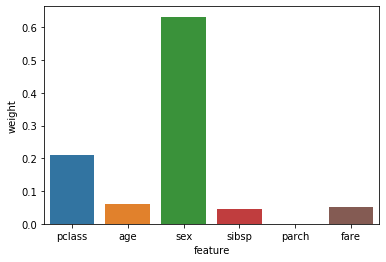

In [1511]:
##age의 분포를 그려보세요 
sns.barplot('feature','weight',data=result_df)
#weight: 가중치, 각 항목이 예측을 하는데 얼마나 영향력을 미쳤는가 정도 

In [1514]:
me = [2,27,1,1,2,50]

In [1515]:
result2 = tree_clf.predict_proba([me])
result2

array([[0.88622754, 0.11377246]])